In [208]:
# Import necessary packages
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Install pytrends which gives access to Google Trends API

In [209]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [210]:
#Setting up the pytrend packages to get access to Google Trends API
from pytrends.request import TrendReq
pytrend = TrendReq(hl='cs', tz=360)

In [211]:
os.getcwd()

'/Users/aghauss/Desktop/Python Project'

In [212]:
#Import of the keyword data
colnames = ["keywords"]
df = pd.read_csv("keyword_list.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")
dataset = []

In [213]:
print(df2)

['Pizza', 'Delivery', 'Burger', 'Wolt', 'Bolt', 'Indian']


In [214]:
#Requesting data from Google Trends
for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-01 2021-01-15',
     geo='CZ')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

In [215]:
#Saving the results
result_2020_cz = pd.concat(dataset, axis=1)
result_2020_cz.to_csv('search_trends.csv')

In [216]:
result_2020_cz.head()

,Pizza,Delivery,Burger,Wolt,Bolt,Indian
date,,,,,,
2020-01-05,75,49,60,24,55,36
2020-01-12,75,30,73,24,60,62
2020-01-19,79,30,81,18,41,75
2020-01-26,77,27,93,19,56,86
2020-02-02,76,30,74,27,61,82


<AxesSubplot:xlabel='date'>

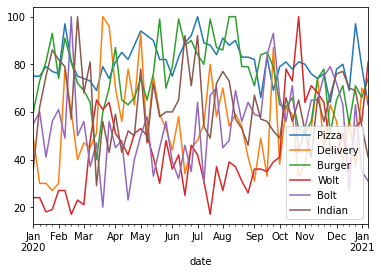

In [217]:
#First glance at the data
result_2020_cz.plot()

In [218]:
#Checking correlation
overall_pearson_r = result_2020_cz.corr().iloc[0,2]
print(f"Pearson r: {overall_pearson_r}")

Pearson r: 0.4268507405652528


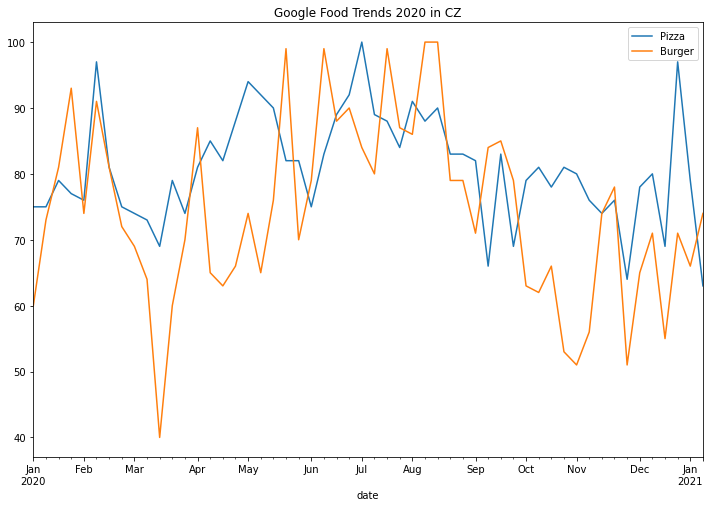

In [219]:
dx = result_2020_cz.plot(figsize = (12,8), y=["Pizza","Burger"], kind="line", title = "Google Food Trends 2020 in CZ")

In [220]:
dataset2 = []

In [221]:
from pytrends.request import TrendReq
pytrend = TrendReq(hl='de', tz=360)

#Requesting data from Google Trends
for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-01 2021-01-15',
     geo='DE')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset2.append(data)

In [222]:
#Saving the results
result_2020_ger = pd.concat(dataset, axis=1)
result_2020_ger.to_csv('search_trends2.csv')

In [223]:
result_2020_ger.head()

,Pizza,Delivery,Burger,Wolt,Bolt,Indian
date,,,,,,
2020-01-05,75,49,60,24,55,36
2020-01-12,75,30,73,24,60,62
2020-01-19,79,30,81,18,41,75
2020-01-26,77,27,93,19,56,86
2020-02-02,76,30,74,27,61,82


In [224]:
# Import data and Set date as index
risk_data = pd.read_csv("Risk Data.csv")
#Set date as index
risk_data = risk_data.set_index("datum")

In [225]:
risk_data.head()

,index rizika
datum,
01.10.2020,52
02.10.2020,52
03.10.2020,52
04.10.2020,52
05.10.2020,57


<AxesSubplot:xlabel='datum'>

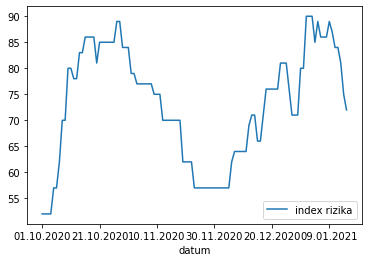

In [179]:
#Plot
risk_data.plot()

In [226]:
risk_data[risk_data.index > "01.10.2020"]

,index rizika
datum,
02.10.2020,52
03.10.2020,52
04.10.2020,52
05.10.2020,57
06.10.2020,57
...,...
11.01.2021,84
12.01.2021,84
13.01.2021,81


In [184]:

max_risk_value = risk_data.max()
max_risk_index = risk_data.idxmax()
print(max_risk_value,max_index)

index rizika    90
dtype: int64 index rizika    01.01.2021
dtype: object
